# Clustering with K-Means++

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# read csv file 'cleaned data'
df = pd.read_csv('cleaned_data.csv')
# drop 'Gender' 'Post-code' 'Balance' 'Home Owner' Columns
df = df.drop(['Gender', 'Post-code','Balance','Home Owner'], axis=1)

In [33]:
def pca_df(X):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    pca.fit(scaled)
    pca_df = pca.transform(scaled)
    pca_columns=['pca_1','pca_2']
    pca_df = pd.DataFrame(pca_df, columns=pca_columns)
    return pca_df
    
def inertias(X):
    inertias = []
    cluster_range = range(1,9)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(cluster_range, inertias, 'bo-')
    plt.xlabel("Cluster")
    plt.ylabel("Inertia")
    plt.title('Elvow Curve')
    plt.show()

def visualise_silhouette_score(X=None, model=None):
    model.fit(X)
    visModel = SilhouetteVisualizer(model)
    visModel.fit(X)
    visModel.poof()

def visualise_correlation(df):
    corr = df.corr()
    unstack = corr.unstack()
    print(unstack[unstack < 1][unstack > 0.3].sort_values(ascending=False))
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(corr, center=0, annot=True,
            fmt='.1f', square=True, cmap = 'RdYlBu_r')
    plt.show()

def pca_transform(X):
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X)
    X['pca_x'] = pca_transformed[:,0]
    X['pca_y'] = pca_transformed[:,1]
    X = X[['pca_x','pca_y']]
    return X

def fit_predict_plot(X, model):
    predictions = model.fit_predict(X)
    centroids = model.cluster_centers_
    silhouette = silhouette_score(X, predictions)
    plot_(X,predictions,centroids)
    accuracy = sum(predictions == df['Fraud']) / len(df)
    # print("centroids:\n{}, predictions:\n{},silhouette:{}, accuracy:{}".format(centroids, predictions, silhouette, accuracy))
    return (centroids, predictions, silhouette, accuracy, model.labels_)

def plot_(X,predictions,centroids):
    f, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)
    for i,column in enumerate(X):
        if i == len(X.columns)-1: break
        ax.scatter(X[predictions==0].iloc[:,lambda X: [i]],X[predictions==0].iloc[:,lambda X: [i+1]],marker='^',c="y")
        ax.scatter(X[predictions==1].iloc[:,lambda X: [i]],X[predictions==1].iloc[:,lambda X: [i+1]],marker='s',c='m')
        ax.scatter(centroids[:, 0], centroids[:, 1], c='k', edgecolors='k', s=50)
    plt.show()

     Income  Employed  Education   Age  Colour
0     10500         0          1  25.0       5
1     26525         1          0  25.0       1
2      8230         0          1  25.0       4
3     25000         0          2  19.0       5
4     15250         0          1  23.0       4
..      ...       ...        ...   ...     ...
115   45050         1          2  54.0       5
116   11250         0          1  29.0       4
117    7450         0          0  19.0       4
118   12250         0          2  25.0       5
119    8450         0          1  23.0       4

[120 rows x 5 columns]
[0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 0]
[[1.85641975e+04 1.35802469e-01 9.38271605e-01 2.89012346e+01
  3.61728395e+00]
 [6.23764103e+04 6.41025641e-01 1.17948718e+00 3.79230769e+01
  2.41025641e+00]]


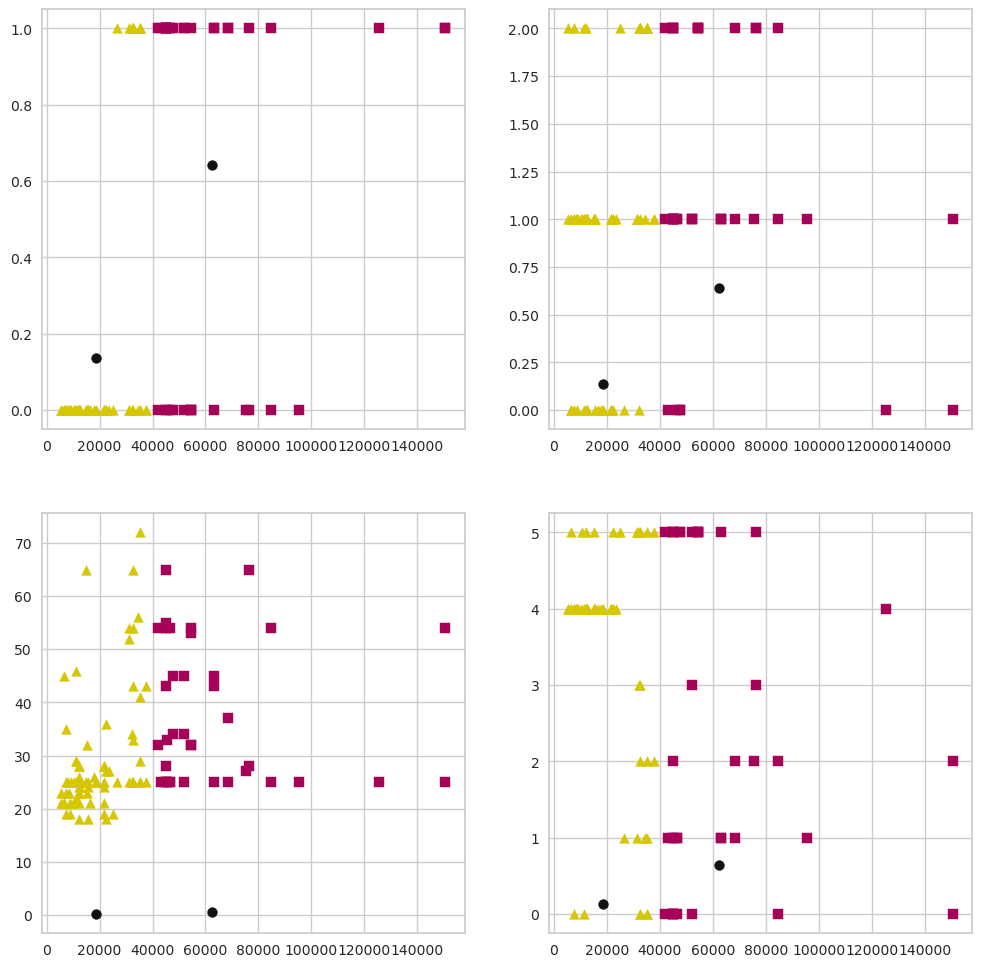

In [34]:

X_features = df.drop(['Fraud'], axis=1)
print(X_features)
kmeans = KMeans(n_clusters=2, max_iter = 1000)
predictions = kmeans.fit_predict(X_features)
print(predictions)

centroids = kmeans.cluster_centers_
print(centroids)

silhouette = silhouette_score(X_features, predictions)

figure, ax = plt.subplots(figsize=(12,12), ncols=2, nrows=2)
ax[0][0].scatter(X_features[predictions==0]['Income'],X_features[predictions==0]['Employed'],marker='^',c="y")
ax[0][0].scatter(X_features[predictions==1]['Income'],X_features[predictions==1]['Employed'],marker='s',c='m')
ax[0][0].scatter(centroids[:, 0], centroids[:, 1], c='k', edgecolors='k', s=50)

ax[0][1].scatter(X_features[predictions==0]['Income'],X_features[predictions==0]['Education'],marker='^',c="y")
ax[0][1].scatter(X_features[predictions==1]['Income'],X_features[predictions==1]['Education'],marker='s',c='m')
ax[0][1].scatter(centroids[:, 0], centroids[:, 1], c='k', edgecolors='k', s=50)

ax[1][0].scatter(X_features[predictions==0]['Income'],X_features[predictions==0]['Age'],marker='^',c="y")
ax[1][0].scatter(X_features[predictions==1]['Income'],X_features[predictions==1]['Age'],marker='s',c='m')
ax[1][0].scatter(centroids[:, 0], centroids[:, 1], c='k', edgecolors='k', s=50)

ax[1][1].scatter(X_features[predictions==0]['Income'],X_features[predictions==0]['Colour'],marker='^',c="y")
ax[1][1].scatter(X_features[predictions==1]['Income'],X_features[predictions==1]['Colour'],marker='s',c='m')
ax[1][1].scatter(centroids[:, 0], centroids[:, 1], c='k', edgecolors='k', s=50)


plt.show()



#### inertias

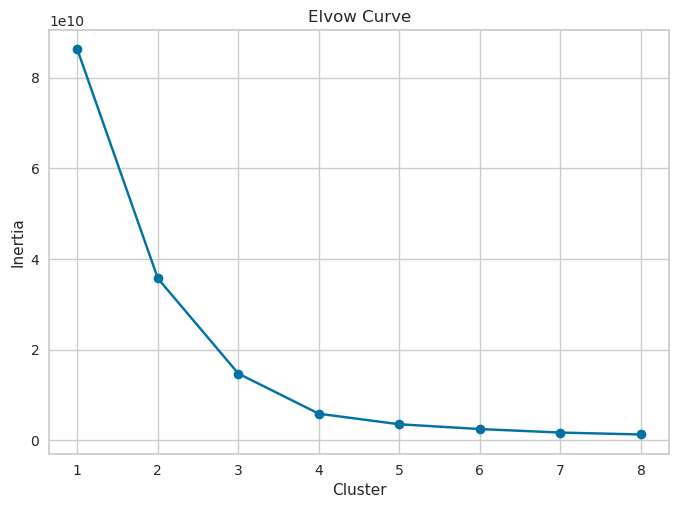

In [35]:
inertias(X_features)

